### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

In [1]:
#Auto reloading 
#%load_ext autoreload
#%autoreload 2
#%reload_ext autoreload 4

In [2]:
#Removing indentation issues:
#!autopep8 --in-place --aggressive --aggressive init_params.py
#!autopep8 --in-place --aggressive --aggressive popconstruct.py
#!autopep8 --in-place --aggressive --aggressive generateepochs.py
#!autopep8 --in-place --aggressive --aggressive qvalues.py

In [3]:
!python setup.py build_ext --inplace

running build_ext
copying build/lib.linux-x86_64-3.6/agent_timestep.cpython-36m-x86_64-linux-gnu.so -> 


In [4]:
#Importing scripts:
import cbgt as cbgt
from frontendhelpers import * 
from tracetype import *
import init_params as par 
import popconstruct as popconstruct
import qvalues as qval
import generateepochs as gen
import generate_stop_dataframe as gen_stop
from agentmatrixinit import *
#from general_init_codeblocks import *
from agent_timestep import timestep_mutator, multitimestep_mutator
import pdb
import pipeline_creation as pl_creat
import mega_loop as ml
import plotting_functions as plt_func
import plotting_helper_functions as plt_help
import matplotlib.pyplot as plt

data_dir = "./Data/"
figure_dir = "./Figures/"


/home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)
2021-11-21 14:40:22,716	INFO worker.py:727 -- Connecting to existing Ray cluster at address: 10.0.0.154:6379


# Create pipeline

### Network pipeline

In [5]:
seed = np.random.randint(0,9999999)
#seed = 1939361
print(seed)
np.random.seed(seed)
to_check = np.random.randint(0,50,10)
print(to_check)

1322330
[ 6 34 42 48 24  2 28  7 31  3]


In [6]:
#Create the whole pipeline.
#This pipeline creates three sub-pipelines: 
#rewards pipeline (rsg), q values pipeline (q_val), network pipeline(pl)

pl = pl_creat.create_main_pipeline()
mega_l = ml.mega_loop

# Timestep loop

In [7]:
#Adding the timestep loop to the main pipeline
pl.add(mega_l)

# Running the pipeline

### 1. Default values

In [8]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': pd.DataFrame([15.],columns=['dpmn_CPP_scale']), #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 50, #number of trials (generateepochs.py)
    'volatility': 10, #frequency of changepoints (generateepochs.py)
    'conflict': 1.0, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 2.9, # 3 instead? how much stimulus the LIP gets at maximum
    'stop_signal_present':False,
    'stop_signal_probability':1.0, # probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude':2.0, # ampitude of the stop signal over base line
    'stop_signal_onset':200., # in ms
    'stop_signal_channel': "any", # "all" (all channels are given the stop signal) 
    'sustainedfraction':0.85
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
}


In [9]:
results = cbgt.ExecutionManager(cores=7).run([pl]*1,[environment]*1)

(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `p

(pid=149799) cp_idx [ 0  7 16 29 37 47 49]
(pid=149799) cp_idx [ 0  7 16 29 37 47 49]
(pid=149799) cp_idx [ 0  7 16 29 37 47 49]
(pid=149799) cp_idx [ 0  7 16 29 37 47 49]
(pid=149799) begin GenStopSchedule
(pid=149799) <class 'float'>
(pid=149799) [12 13  9 43 46 32 38 39 17  4 41 36 29  0 48 20 26 34 19  2  7 11 14 15
(pid=149799)  47 18 33 30 24 23  1  5 25 35 31 45 37  6  8 44 21 16 42 22 27  3 28 49
(pid=149799)  40 10]
(pid=149799) stop_df
(pid=149799)    stop_signal_present  stop_signal_probability stop_signal_channel
(pid=149799) 0                False                      1.0                 any
(pid=149799) stop_channels_df
(pid=149799)      left  right  trial_num
(pid=149799) 0    True  False          0
(pid=149799) 1   False   True          1
(pid=149799) 2    True  False          2
(pid=149799) 3   False   True          3
(pid=149799) 4    True  False          4
(pid=149799) 5    True  False          5
(pid=149799) 6    True  False          6
(pid=149799) 7    True  False 

(pid=149799) 4 2 0.0667`
(pid=149799) 4 2 0.0667`
(pid=149799) 4 4 0.0667`
(pid=149799) 4 4 0.0667`
(pid=149799) 4 5 0.0667`
(pid=149799) 5 1 1.0`
(pid=149799) 4 5 0.0667`
(pid=149799) 5 1 1.0`
(pid=149799) 5 3 0.0667`
(pid=149799) 5 3 0.0667`
(pid=149799) 5 4 0.0667`
(pid=149799) 5 4 0.0667`
(pid=149799) 5 5 0.0667`
(pid=149799) 6 0 1.0`
(pid=149799) 6 6 0.45`
(pid=149799) 5 5 0.0667`
(pid=149799) 6 0 1.0`
(pid=149799) 6 6 0.45`
(pid=149799) 6 8 0.45`
(pid=149799) 7 1 1.0`
(pid=149799) 7 7 0.45`
(pid=149799) 7 9 0.45`
(pid=149799) 8 4 1.0`
(pid=149799) 6 8 0.45`
(pid=149799) 7 1 1.0`
(pid=149799) 7 7 0.45`
(pid=149799) 7 9 0.45`
(pid=149799) 8 4 1.0`
(pid=149799) 8 6 0.5`
(pid=149799) 8 8 0.45`
(pid=149799) 9 5 1.0`
(pid=149799) 9 7 0.5`
(pid=149799) 8 6 0.5`
(pid=149799) 8 8 0.45`
(pid=149799) 9 5 1.0`
(pid=149799) 9 7 0.5`
(pid=149799) 9 9 0.45`
(pid=149799) 14 6 1.0`
(pid=149799) 14 7 1.0`
(pid=149799) 14 8 1.0`
(pid=149799) 14 9 1.0`
(pid=149799) 14 14 1.0`
(pid=149799) 15 10 1.0`

(pid=149799) phasetimer 301
(pid=149799) globaltimer 4750
(pid=149799) trial_num 4
(pid=149799)   action
(pid=149799) 0   left
(pid=149799) 1  right
(pid=149799) chosen_action right
(pid=149799) self.dpmndefaults['dpmn_DAp'].values[0] 9.10170545753546
(pid=149799) phasetimer 301
(pid=149799) globaltimer 4750
(pid=149799) trial_num 4
(pid=149799)   action
(pid=149799) 0   left
(pid=149799) 1  right
(pid=149799) chosen_action right
(pid=149799) self.dpmndefaults['dpmn_DAp'].values[0] 9.10170545753546
(pid=149799) phasetimer 115
(pid=149799) globaltimer 5466
(pid=149799) gateFRs [18.         30.22222222]
(pid=149799) thresholds_crossed [1]
(pid=149799) phasetimer 115
(pid=149799) globaltimer 5466
(pid=149799) gateFRs [18.         30.22222222]
(pid=149799) thresholds_crossed [1]
(pid=149799) phasetimer 301
(pid=149799) globaltimer 5767
(pid=149799) trial_num 5
(pid=149799)   action
(pid=149799) 0   left
(pid=149799) 1  right
(pid=149799) chosen_action right
(pid=149799) self.dpmndefaults['

(pid=149799) phasetimer 130
(pid=149799) globaltimer 13188
(pid=149799) gateFRs [30.88888889 19.77777778]
(pid=149799) thresholds_crossed [0]
(pid=149799) phasetimer 130
(pid=149799) globaltimer 13188
(pid=149799) gateFRs [30.88888889 19.77777778]
(pid=149799) thresholds_crossed [0]
(pid=149799) phasetimer 301
(pid=149799) globaltimer 13489
(pid=149799) trial_num 12
(pid=149799)   action
(pid=149799) 0   left
(pid=149799) 1  right
(pid=149799) chosen_action left
(pid=149799) self.dpmndefaults['dpmn_DAp'].values[0] -1.504802832253949
(pid=149799) phasetimer 301
(pid=149799) globaltimer 13489
(pid=149799) trial_num 12
(pid=149799)   action
(pid=149799) 0   left
(pid=149799) 1  right
(pid=149799) chosen_action left
(pid=149799) self.dpmndefaults['dpmn_DAp'].values[0] -1.504802832253949
(pid=149799) phasetimer 182
(pid=149799) globaltimer 14272
(pid=149799) gateFRs [31.33333333 19.77777778]
(pid=149799) thresholds_crossed [0]
(pid=149799) phasetimer 182
(pid=149799) globaltimer 14272
(pid=

(pid=149799) phasetimer 110
(pid=149799) globaltimer 22059
(pid=149799) gateFRs [21.55555556 30.66666667]
(pid=149799) thresholds_crossed [1]
(pid=149799) phasetimer 110
(pid=149799) globaltimer 22059
(pid=149799) gateFRs [21.55555556 30.66666667]
(pid=149799) thresholds_crossed [1]
(pid=149799) phasetimer 301
(pid=149799) globaltimer 22360
(pid=149799) trial_num 20
(pid=149799)   action
(pid=149799) 0   left
(pid=149799) 1  right
(pid=149799) chosen_action right
(pid=149799) phasetimer 301
(pid=149799) globaltimer 22360
(pid=149799) trial_num 20
(pid=149799)   action
(pid=149799) 0   left
(pid=149799) 1  right
(pid=149799) chosen_action right
(pid=149799) self.dpmndefaults['dpmn_DAp'].values[0] 14.354879325345731
(pid=149799) self.dpmndefaults['dpmn_DAp'].values[0] 14.354879325345731
(pid=149799) phasetimer 108
(pid=149799) globaltimer 23069
(pid=149799) gateFRs [17.55555556 31.11111111]
(pid=149799) thresholds_crossed [1]
(pid=149799) phasetimer 108
(pid=149799) globaltimer 23069
(pi

(pid=149799) phasetimer 92
(pid=149799) globaltimer 30073
(pid=149799) gateFRs [13.55555556 31.55555556]
(pid=149799) thresholds_crossed [1]
(pid=149799) phasetimer 92
(pid=149799) globaltimer 30073
(pid=149799) gateFRs [13.55555556 31.55555556]
(pid=149799) thresholds_crossed [1]
(pid=149799) phasetimer 301
(pid=149799) globaltimer 30374
(pid=149799) trial_num 28
(pid=149799)   action
(pid=149799) 0   left
(pid=149799) 1  right
(pid=149799) chosen_action right
(pid=149799) self.dpmndefaults['dpmn_DAp'].values[0] -8.290293101970702
(pid=149799) phasetimer 301
(pid=149799) globaltimer 30374
(pid=149799) trial_num 28
(pid=149799)   action
(pid=149799) 0   left
(pid=149799) 1  right
(pid=149799) chosen_action right
(pid=149799) self.dpmndefaults['dpmn_DAp'].values[0] -8.290293101970702
(pid=149799) phasetimer 104
(pid=149799) globaltimer 31079
(pid=149799) gateFRs [18.44444444 30.22222222]
(pid=149799) thresholds_crossed [1]
(pid=149799) phasetimer 104
(pid=149799) globaltimer 31079
(pid=

(pid=149799) phasetimer 112
(pid=149799) globaltimer 39320
(pid=149799) gateFRs [30.66666667 18.66666667]
(pid=149799) thresholds_crossed [0]
(pid=149799) phasetimer 112
(pid=149799) globaltimer 39320
(pid=149799) gateFRs [30.66666667 18.66666667]
(pid=149799) thresholds_crossed [0]
(pid=149799) phasetimer 301
(pid=149799) globaltimer 39621
(pid=149799) trial_num 36
(pid=149799)   action
(pid=149799) 0   left
(pid=149799) 1  right
(pid=149799) chosen_action left
(pid=149799) self.dpmndefaults['dpmn_DAp'].values[0] 4.350270475239502
(pid=149799) phasetimer 301
(pid=149799) globaltimer 39621
(pid=149799) trial_num 36
(pid=149799)   action
(pid=149799) 0   left
(pid=149799) 1  right
(pid=149799) chosen_action left
(pid=149799) self.dpmndefaults['dpmn_DAp'].values[0] 4.350270475239502
(pid=149799) phasetimer 156
(pid=149799) globaltimer 40378
(pid=149799) gateFRs [30.44444444 22.88888889]
(pid=149799) thresholds_crossed [0]
(pid=149799) phasetimer 156
(pid=149799) globaltimer 40378
(pid=14

(pid=149799) phasetimer 109
(pid=149799) globaltimer 48033
(pid=149799) gateFRs [21.77777778 30.22222222]
(pid=149799) thresholds_crossed [1]
(pid=149799) phasetimer 109
(pid=149799) globaltimer 48033
(pid=149799) gateFRs [21.77777778 30.22222222]
(pid=149799) thresholds_crossed [1]
(pid=149799) phasetimer 301
(pid=149799) globaltimer 48334
(pid=149799) trial_num 44
(pid=149799)   action
(pid=149799) 0   left
(pid=149799) 1  right
(pid=149799) chosen_action right
(pid=149799) self.dpmndefaults['dpmn_DAp'].values[0] 1.6409870320564384
(pid=149799) phasetimer 301
(pid=149799) globaltimer 48334
(pid=149799) trial_num 44
(pid=149799)   action
(pid=149799) 0   left
(pid=149799) 1  right
(pid=149799) chosen_action right
(pid=149799) self.dpmndefaults['dpmn_DAp'].values[0] 1.6409870320564384
(pid=149799) phasetimer 105
(pid=149799) globaltimer 49040
(pid=149799) gateFRs [19.33333333 30.44444444]
(pid=149799) thresholds_crossed [1]
(pid=149799) phasetimer 105
(pid=149799) globaltimer 49040
(pi

In [10]:
results[0].keys()

dict_keys(['params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'newpathways', 'Q_support_params', 'Q_df', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'stop_signal_present', 'stop_signal_probability', 'stop_signal_amplitude', 'stop_signal_onset', 'stop_signal_channel', 'sustainedfraction', 'actionchannels', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'block', 'stop_df', 'stop_channels_df', 'stop_amplitude_df', 'stop_onset_df', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim', 'dpmndefaults', 'd1defaults', 'd2defaults', 'popdata', 'pathways', 'connectivity_AMPA', 'meaneff_AMPA', 'plastic_AMPA', 'connectivity_GABA', 'meaneff_GABA', 'plastic_GABA', 'connectivity_NMDA', 'meaneff_NMDA', 'plastic_NMDA', 'AMPA_con', 'AMPA_eff', 'GABA_con', 'GABA_eff', 'NMDA_con', 'NMDA_eff', 'agent', 'datatables', 'reward_val', 'popfreqs'])

In [11]:
cbgt.saveResults(results,data_dir+'network_data_'+str(seed),['popfreqs','popdata','Q_support_params'])

In [12]:
weights = np.array(results[0]['agent'].hist_w)
weights[0]
np.shape(weights)

(54367, 2, 2)

In [13]:
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,left,0,199,199,500,500,right,0.0
1,left,1101,1303,202,503,1604,right,0.0
2,right,2205,2330,125,426,2631,right,1.0
3,right,3232,3436,204,505,3737,right,1.0
4,right,4338,4449,111,412,4750,right,1.0
5,right,5351,5466,115,416,5767,right,1.0
6,right,6368,6469,101,402,6770,right,1.0
7,right,7371,7473,102,403,7774,left,0.0
8,left,8375,8871,496,797,9172,left,1.0
9,right,9773,9932,159,460,10233,left,0.0


In [14]:
np.shape(weights)

(54367, 2, 2)

In [15]:

reshaped_wts = weights.reshape(len(weights),4)
nuc_list = ['D1-left','D2-left','D1-right','D2-right' ]
ind_list = [(0,0),(0,1),(1,0),(1,1)]
weights_df = pd.DataFrame(columns=["weights","trials","nuclei"])

for j in np.arange(4):
    temp = pd.DataFrame()
    temp["weights"] = [ np.mean(reshaped_wts[:,j][datatables[0]['stimulusstarttime'][i]:datatables[0]['stimulusstarttime'][i+1]])   for i in np.arange(len(datatables[0])-1) ]
    #temp["weights"] = [ weights[:,ind_list[j][0],ind_list[j][1],:,:][datatables[0]['stimulusstarttime'][i]:datatables[0]['stimulusstarttime'][i+1]])   for i in np.arange(len(datatables[0])-1) ]
    temp["trials"] = np.arange(0,len(datatables[0])-1)
    temp["nuclei"] = nuc_list[j]
    weights_df = weights_df.append(temp)
    

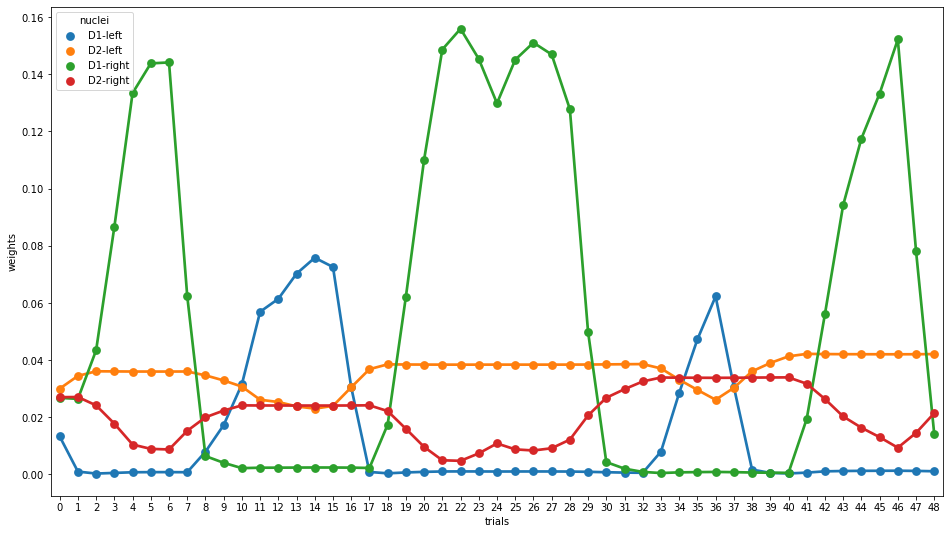

In [16]:
import seaborn as sns
fig,ax = plt.subplots(1,1,figsize=(16,9))
sns.pointplot(x="trials",y="weights",hue="nuclei",data=weights_df,ax=ax)
fig.savefig(figure_dir+"Weights_"+str(seed)+".png")

In [17]:
#weights_all = np.array(results[0]['agent'].hist_w_all)
#shape_all = np.shape(weights_all)
#print(shape_all)
#weights_all_reshaped = weights_all.reshape(shape_all[0],4,shape_all[3]*shape_all[4])
#np.shape(weights_all_reshaped)


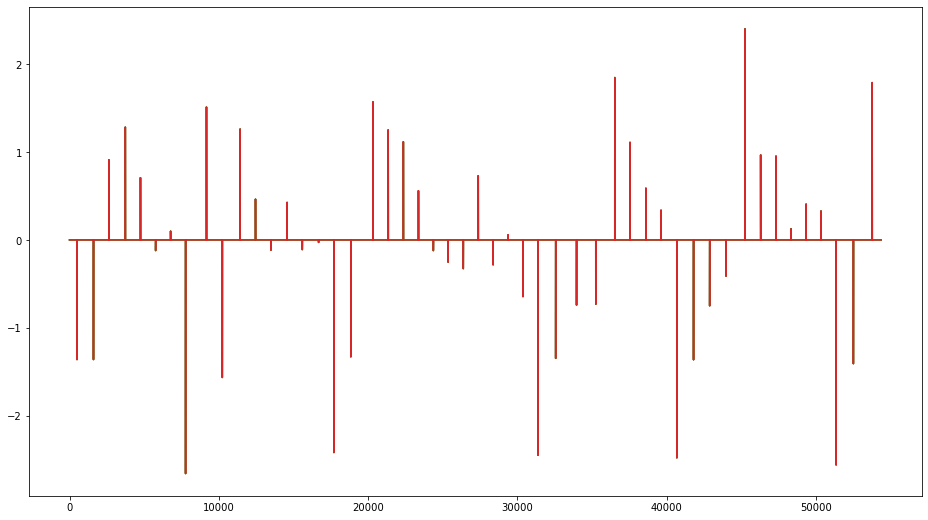

In [18]:
plt.figure(figsize=(16,9))
plt.plot(np.array(results[0]['agent'].hist_DAp))
plt.savefig(figure_dir+"Dopamine_"+str(seed)+".png")
plt.show()

In [19]:
results[0]['actionchannels']

,action
0,left
1,right


In [20]:
results[0]['popdata']

,name,action,N,C,Taum,RestPot,ResetPot,Threshold,RestPot_ca,Alpha_ca,...,dpmn_APRE,dpmn_APOST,dpmn_XPRE,dpmn_XPOST,dpmn_type,dpmn_alphaw,dpmn_a,dpmn_b,dpmn_c,column
0,GPi`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,0
1,GPi`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,1
2,STNE`,left`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,2
3,STNE`,right`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,3
4,GPeP`,left`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,4
5,GPeP`,right`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,5
6,D1STR`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,1`,18.333333333333332`,1.0`,0.1`,0.05`,6
7,D1STR`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,1`,18.333333333333332`,1.0`,0.1`,0.05`,7
8,D2STR`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,2`,-15.0`,0.5`,0.005`,0.05`,8
9,D2STR`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,2`,-15.0`,0.5`,0.005`,0.05`,9


In [21]:
results[0]['stop_channels_df']

,left,right,trial_num
0,True,False,0
1,False,True,1
2,True,False,2
3,False,True,3
4,True,False,4
5,True,False,5
6,True,False,6
7,True,False,7
8,False,True,8
9,False,True,9


In [22]:
import importlib
importlib.reload(plt_help)

<module 'plotting_helper_functions' from '/home/bahuguna/Work/CBGT_CMU/cbgt2_plasticity/plotting_helper_functions.py'>

In [23]:
firing_rates, reward_q_df, performance, rt_dist, total_performance = plt_help.extract_relevant_frames(results,seed)

/home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


   %_correct_actions     seed n_trials  volatility  conflict  \
0               68.0  1322330      NaN        10.0       1.0   

   volatility/num_trials  Q_val->dopamine_scale  
0                   20.0                   35.0  
[     level_0  index  Trials variable    value data_type       seed  n_trials  \
0          0     51      -1     left  0.50000      Q_df  1322330_0      50.0   
1          1     52       0     left  0.27500      Q_df  1322330_0      50.0   
2          2     53       1     left  0.15125      Q_df  1322330_0      50.0   
3          3     54       2     left  0.15125      Q_df  1322330_0      50.0   
4          4     55       3     left  0.15125      Q_df  1322330_0      50.0   
..       ...    ...     ...      ...      ...       ...        ...       ...   
297       45     45      45    right  1.00000     block  1322330_0      50.0   
298       46     46      46    right  1.00000     block  1322330_0      50.0   
299       47     47      47     left  0.00000     

In [24]:
plt_help.pool_data()

['7706190', '8821440', '2537523', '4349260', '121417', '4251259', '6573484', '693849', '1051453', '5308181', '5543161', '1068178', '1322330', '238535', '7159342', '2579240', '8074787']


In [25]:
reward_q_df[0]

,level_0,index,Trials,variable,value,data_type,seed,n_trials,volatility,volatility/num_trials,conflict
0,0,51,-1,left,0.50000,Q_df,1322330_0,50.0,10.0,20.0,1.0
1,1,52,0,left,0.27500,Q_df,1322330_0,50.0,10.0,20.0,1.0
2,2,53,1,left,0.15125,Q_df,1322330_0,50.0,10.0,20.0,1.0
3,3,54,2,left,0.15125,Q_df,1322330_0,50.0,10.0,20.0,1.0
4,4,55,3,left,0.15125,Q_df,1322330_0,50.0,10.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
297,45,45,45,right,1.00000,block,1322330_0,50.0,10.0,20.0,1.0
298,46,46,46,right,1.00000,block,1322330_0,50.0,10.0,20.0,1.0
299,47,47,47,left,0.00000,block,1322330_0,50.0,10.0,20.0,1.0
300,48,48,48,left,0.00000,block,1322330_0,50.0,10.0,20.0,1.0


In [26]:
total_performance

,%_correct_actions,seed,n_trials,volatility,conflict,volatility/num_trials,Q_val->dopamine_scale
0,68.0,1322330,NaN,10.0,1.0,20.0,35.0


In [27]:
results[0]['block']

array(['right', 'right', 'right', 'right', 'right', 'right', 'right',
       'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left',
       'left', 'right', 'right', 'right', 'right', 'right', 'right',
       'right', 'right', 'right', 'right', 'right', 'right', 'right',
       'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left',
       'right', 'right', 'right', 'right', 'right', 'right', 'right',
       'right', 'right', 'right', 'left', 'left', 'right'], dtype='<U5')

In [28]:
results[0]['popfreqs']

,GPi_left,GPi_right,STNE_left,STNE_right,GPeP_left,GPeP_right,D1STR_left,D1STR_right,D2STR_left,D2STR_right,Cx_left,Cx_right,Th_left,Th_right,FSI_common,CxI_common,Time (ms)
0,73.111111,72.000000,24.844444,23.711111,61.800000,62.111111,1.111111,2.000000,3.555556,2.666667,0.0,0.0,8.666667,6.444444,8.222222,0.0,0
1,72.222222,71.555556,24.666667,23.533333,61.644444,62.244444,1.111111,1.777778,3.555556,2.444444,0.0,0.0,8.444444,6.444444,8.222222,0.0,1
2,71.555556,71.555556,24.533333,23.577778,62.000000,62.222222,1.111111,1.777778,3.555556,2.444444,0.0,0.0,8.444444,6.444444,8.222222,0.0,2
3,72.222222,71.333333,24.666667,23.555556,61.866667,62.533333,1.111111,1.777778,3.555556,2.444444,0.0,0.0,8.000000,6.444444,8.000000,0.0,3
4,72.222222,70.666667,24.822222,23.533333,61.800000,62.555556,0.888889,1.777778,3.333333,2.444444,0.0,0.0,8.000000,6.444444,8.222222,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54363,73.111111,68.444444,25.755556,23.955556,63.377778,61.488889,1.333333,2.444444,2.888889,2.666667,0.0,0.0,4.666667,6.666667,8.222222,0.0,54363
54364,72.444444,70.000000,25.644444,24.111111,63.955556,61.266667,1.555556,2.222222,2.888889,2.888889,0.0,0.0,4.000000,6.666667,8.222222,0.0,54364
54365,70.888889,70.666667,25.266667,24.266667,64.400000,60.866667,1.555556,2.222222,2.888889,2.888889,0.0,0.0,4.222222,6.666667,8.222222,0.0,54365
54366,69.555556,70.444444,24.800000,24.488889,64.555556,60.600000,1.555556,2.000000,2.666667,2.888889,0.0,0.0,4.222222,6.666667,8.000000,0.0,54366


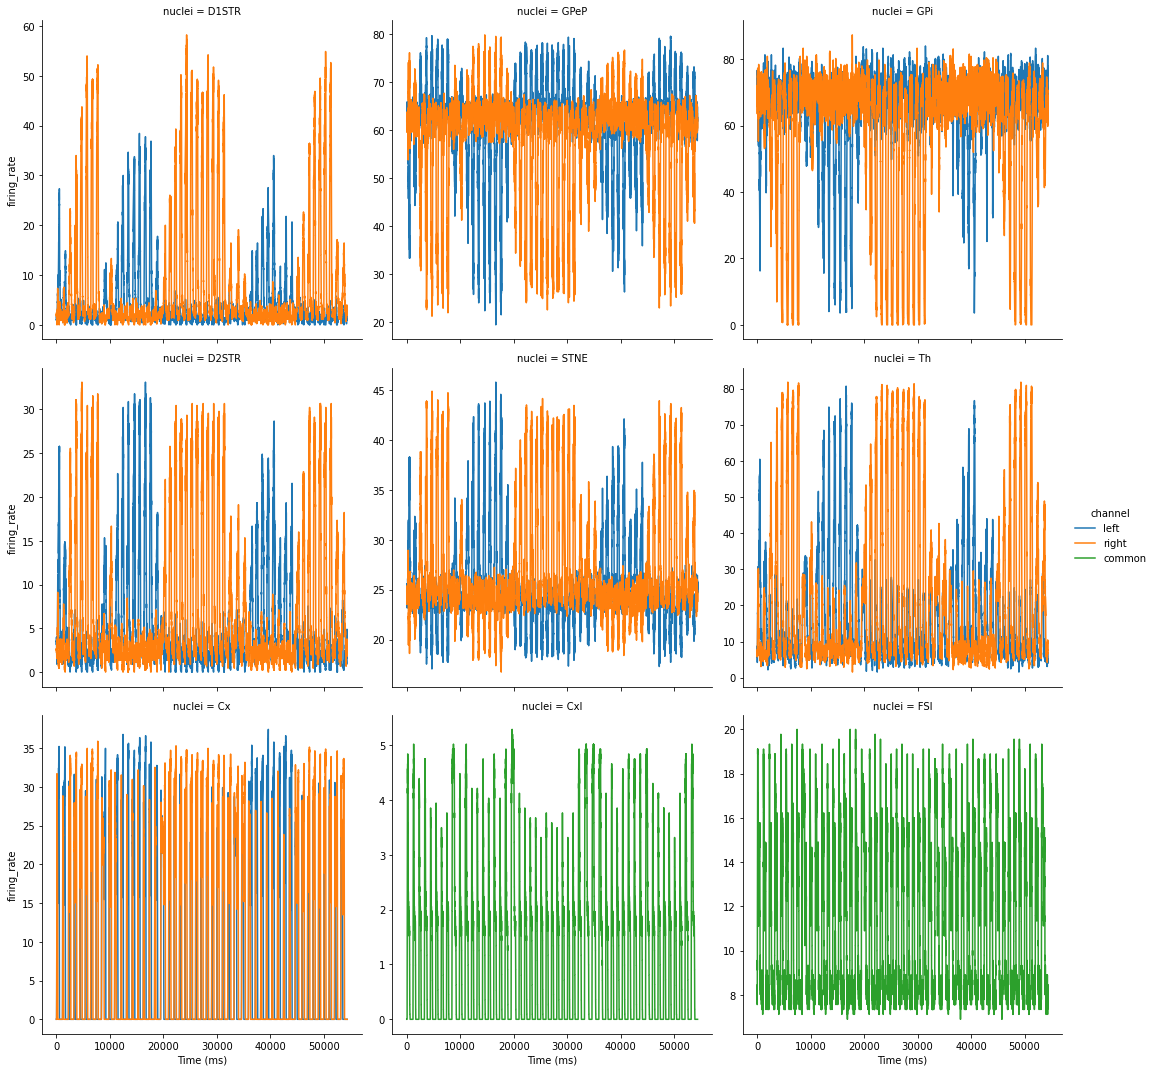

In [29]:
# You can smoothen the FR by sending smooth=True, default: smooth=False
#plt_func.plot_fr(results[0],smooth=True)
plt_func.plot_fr(firing_rates,seed)


In [30]:
# LLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRRRRRRRLLLLLLLLLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRR

# LLLRLLLRLLLRRLLLLLRRRRRRLLRRRRLLRRRLRRRRLLLLLRLLRLLLLLRLLLLRLLLLLRRRRRRRRRRRRRRRRR

# LLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRRRRRRRLLLLLLLLLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRR

In [31]:
reward_q_df[0]

,level_0,index,Trials,variable,value,data_type,seed,n_trials,volatility,volatility/num_trials,conflict
0,0,51,-1,left,0.50000,Q_df,1322330_0,50.0,10.0,20.0,1.0
1,1,52,0,left,0.27500,Q_df,1322330_0,50.0,10.0,20.0,1.0
2,2,53,1,left,0.15125,Q_df,1322330_0,50.0,10.0,20.0,1.0
3,3,54,2,left,0.15125,Q_df,1322330_0,50.0,10.0,20.0,1.0
4,4,55,3,left,0.15125,Q_df,1322330_0,50.0,10.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
297,45,45,45,right,1.00000,block,1322330_0,50.0,10.0,20.0,1.0
298,46,46,46,right,1.00000,block,1322330_0,50.0,10.0,20.0,1.0
299,47,47,47,left,0.00000,block,1322330_0,50.0,10.0,20.0,1.0
300,48,48,48,left,0.00000,block,1322330_0,50.0,10.0,20.0,1.0


In [32]:
import importlib
importlib.reload(plt_func)

<module 'plotting_functions' from '/home/bahuguna/Work/CBGT_CMU/cbgt2_plasticity/plotting_functions.py'>

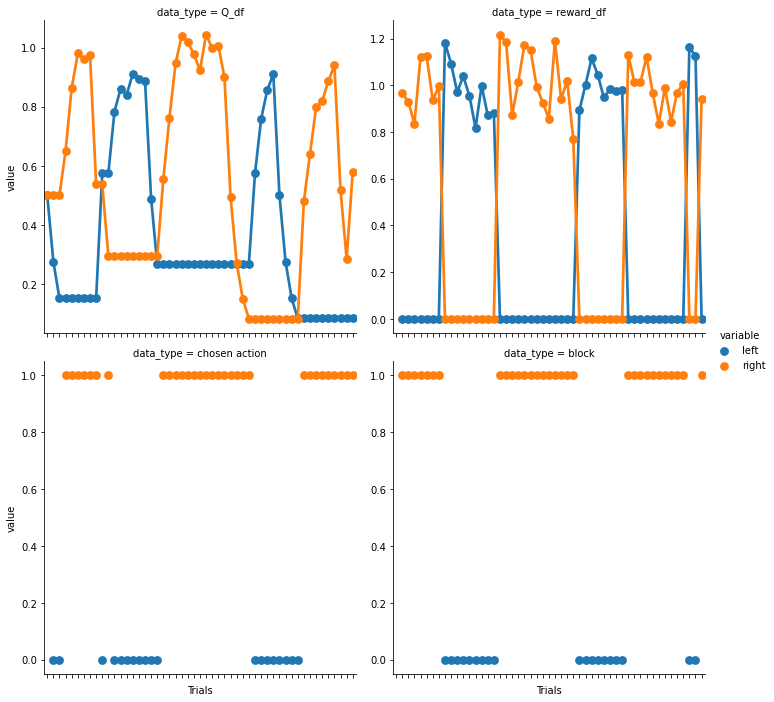

In [33]:
plt_func.plot_reward_Q_df(reward_q_df)

In [34]:
savedresults = cbgt.loadResults(data_dir+'network_data_'+str(seed))
savedresults[0]['Q_support_params']

,bayes_unif_min,bayes_unif_max,bayes_H,bayes_sF,q_alpha,dpmn_CPP_scale,reward_value,chosen_action
0,0.0,2.0,0.05,1.25,0.45,35.0,0.942131,right


In [35]:
datatables = cbgt.collateVariable(results,'datatables')

In [36]:
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,left,0,199,199,500,500,right,0.0
1,left,1101,1303,202,503,1604,right,0.0
2,right,2205,2330,125,426,2631,right,1.0
3,right,3232,3436,204,505,3737,right,1.0
4,right,4338,4449,111,412,4750,right,1.0
5,right,5351,5466,115,416,5767,right,1.0
6,right,6368,6469,101,402,6770,right,1.0
7,right,7371,7473,102,403,7774,left,0.0
8,left,8375,8871,496,797,9172,left,1.0
9,right,9773,9932,159,460,10233,left,0.0


In [37]:
total_performance

,%_correct_actions,seed,n_trials,volatility,conflict,volatility/num_trials,Q_val->dopamine_scale
0,68.0,1322330,NaN,10.0,1.0,20.0,35.0


In [38]:
import pylab as pl
import seaborn as sns
import os
    
def pool_data():
    # For now only reaction time distribution and performance is pooled
    
    seeds = [x   for x in os.listdir(data_dir) if os.path.isdir(data_dir+x) ]
    print(seeds)
    performance = pd.DataFrame()
    total_performance = pd.DataFrame()
    cp_aligned_B = pd.DataFrame()
    rt_dist = pd.DataFrame()
    
    for s in seeds:
        perf = pd.read_csv(data_dir+s+"/performance.csv")
        performance = performance.append(perf)
        
        rt = pd.read_csv(data_dir+s+"/rt_dist.csv")
        rt_dist = rt_dist.append(rt)
        
        tot_perf = pd.read_csv(data_dir+s+"/total_performance.csv")
        total_performance = total_performance.append(tot_perf)
        
    performance.to_csv(data_dir+"performance_all.csv")
    rt_dist.to_csv(data_dir+"rt_distribution_all.csv")
    total_performance.to_csv(data_dir+"total_performance_all.csv")

def performance_all(performance=[],rt_dist=[],total_performance=[]):
    if len(performance) == 0 and len(rt_dist) == 0 and len(total_performance) ==0:
        print("Pooling data")
        pool_data()
        performance = pd.read_csv(data_dir+"performance_all.csv")
        rt_dist = pd.read_csv(data_dir+"rt_distribution_all.csv")
        total_performance = pd.read_csv(data_dir+"total_performance_all.csv")
        post_fix = "all"
    else:
        post_fix = str(performance["seed"][0]).split('_')[0]
    g1 = sns.catplot(x="block",y="%_rewarded_actions",hue="actions",data=performance,col="conflict",kind="bar")
    g1.fig.savefig(figure_dir+"Performance_rewarded_actions_all.png")
    g4 = sns.catplot(x="block",y="%_action",hue="actions",data=performance,col="conflict",kind="bar")
    g4.fig.savefig(figure_dir+"Performance_actions_"+post_fix+".png")
    g5 = sns.catplot(x="conflict",y="%_correct_actions",data=total_performance,col="volatility",kind="bar")
    g5.fig.savefig(figure_dir+"Total_performance_actions_"+post_fix+".png")
    
    
    
    rt_dist = rt_dist.reset_index()
    pl.figure()
    hist = sns.histplot(x="decisiondurationplusdelay",data=rt_dist,hue="conflict",kde=True,palette="deep",stat="density")
    hist.figure.savefig(figure_dir+"RT_distribution_"+post_fix+".png")


Pooling data
['7706190', '8821440', '2537523', '4349260', '121417', '4251259', '6573484', '693849', '1051453', '5308181', '5543161', '1068178', '1322330', '238535', '7159342', '2579240', '8074787']


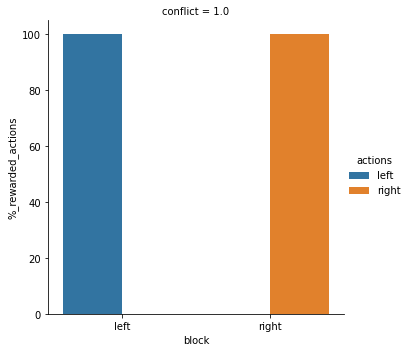

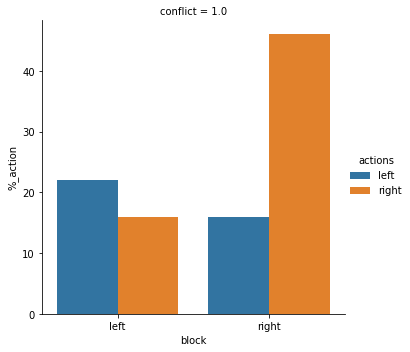

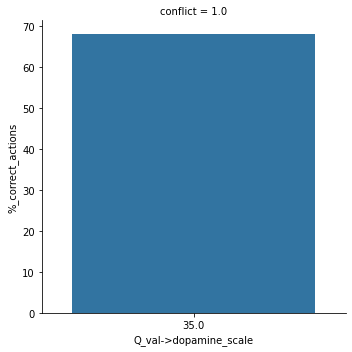

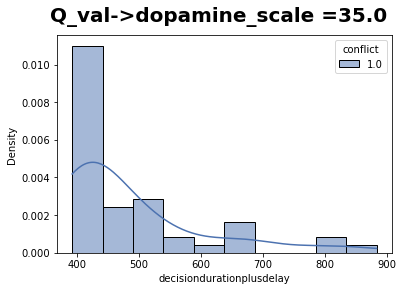

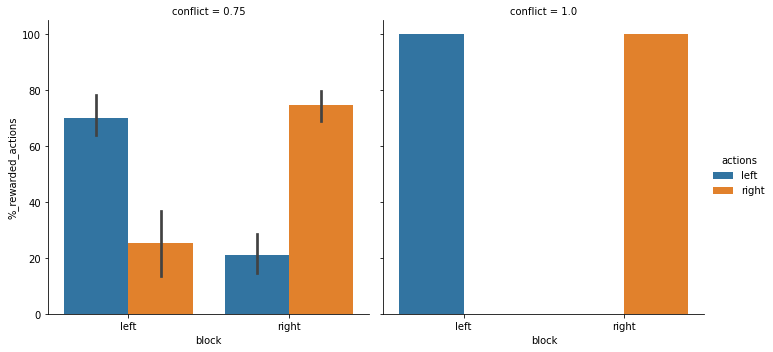

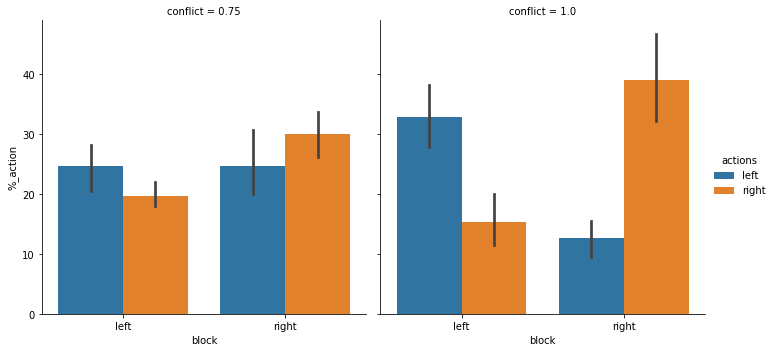

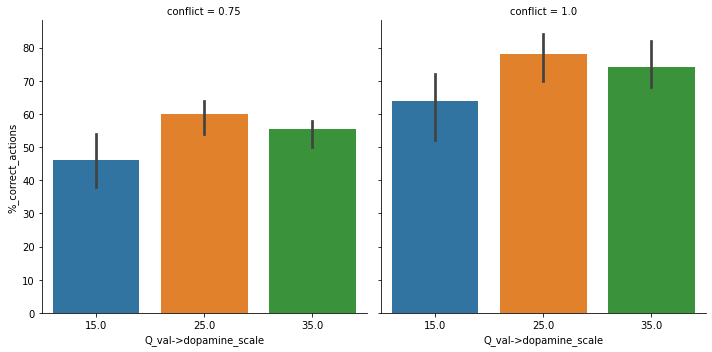

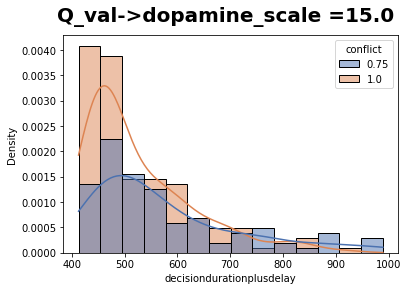

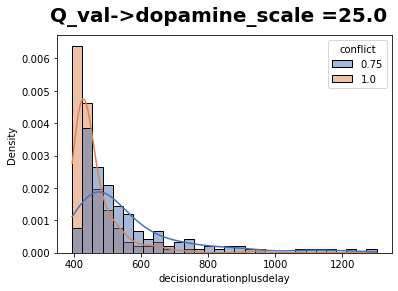

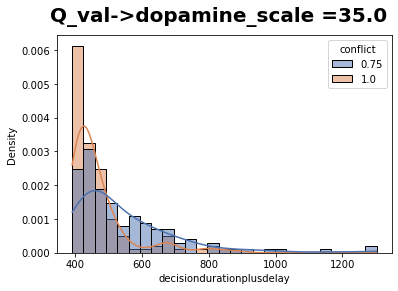

In [39]:








plt_func.performance_all(performance,rt_dist,total_performance)
# To plot performance and rt distributions for all the simulations you have run so far, call performance_all with empty lists
# Pools data over seeds and plots the performance
plt_func.performance_all([],[],[])

    

In [ ]:
cbgt.comparisonTable(results, ['n_trials','volatility','conflict'])

In [ ]:
popfreqs = cbgt.collateVariable(results,'popfreqs')

In [ ]:
popdata = cbgt.collateVariable(results,'popdata')

In [ ]:
popdata[0][popdata[0]['name'] == 'LIP']['column']

In [ ]:
plt.plot(popfreqs[0].iloc[:,7])
plt.plot(popfreqs[0].iloc[:,8])
plt.show()

### 2. Modifying default values 

### 2.1 Modifying values 

In [ ]:
environment = {
    'params': pd.DataFrame([[8, 30]], columns=['N', 'C']),
    'pops' : {'FSI': {'Taum': [60]}}, 
    'receps' : pd.DataFrame([[100, 100]], columns=['Tau_AMPA', 'Tau_GABA']), 
    'base' : {'FSI': {'FreqExt_AMPA': [100]}}, 
    'dpmns' : pd.DataFrame([[400, 100]], columns=['dpmn_wmax', 'dpmn_tauDOP']),
    'd1' : pd.DataFrame([[3, 50]], columns=['dpmn_type', 'dpmn_c']),
    'd2' : pd.DataFrame([[3, 50]], columns=['dpmn_type', 'dpmn_c']),
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), 
    'newpathways' : pd.DataFrame([['LIP', 'D1STR', 'AMPA', 'syn', 700, 0.027]], columns=['src', 'dest', 'receptor', 'type', 'con', 'eff']), 
    'Q_support_params': None,
    'Q_df':None,
    'n_trials': 5,
    'volatility': 2,
    'conflict': 0.7,
    'reward_mu': 1,
    'reward_std': 0.1,
}
results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

### 2.2 Modifying a subset of values

In [ ]:
environment = {
    'params': pd.DataFrame([[4, 1]], columns=['N', 'C']), 
    'pops': None,
    'receps' : None, 
    'base' : None,
    'dpmns' : None,
    'd1' : None,
    'd2' : None,
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), 
    'newpathways' : None, 
    'Q_support_params': None,
    'Q_df':None,
    'n_trials': 5,
    'volatility': 2,
    'conflict': 0.7,
    'reward_mu': 1,
    'reward_std': 0.1,
}

results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

### 3. Back to default values 

In [ ]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 5, #number of trials (generateepochs.py)
    'volatility': 2, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
}
results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

In [ ]:
#?

In [ ]:
dev = cbgt.Pipeline()

In [ ]:
dev.add(codeblock_agent_phase0)

In [ ]:
output = cbgt.ExecutionManager(cores=7).run(dev,results) 